
https://doi.org/10.3844/jcssp.2020.1401.1416

https://machinelearningmastery.com/how-to-develop-lstm-models-for-multi-step-time-series-forecasting-of-household-power-consumption/

https://www.tensorflow.org/tutorials/structured_data/time_series

In [20]:
import os

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

In [70]:
from utils import (
    build_dataframe,
    build_window,
    build_model,
    evaluate_model,
    summarize_scores,
    plot_scores,
    generate_actuals_and_predictions,
    plot_offset,
    build_model_for_tuning,
    load_tuned_tcn
)

import functools

import pandas as pd

import keras_tuner as kt

ImportError: cannot import name 'load_tuned_tcn' from 'utils' (/Users/rob/Documents/PycharmProjects/zoomcamp-ts-project/utils.py)

In [22]:
df = build_dataframe("^GSPC")

df

,volume,high,low,close,open,adjclose
date,,,,,,
1999-01-04,877000000,1248.810059,1219.099976,1228.099976,1229.229980,1228.099976
1999-01-05,775000000,1246.109985,1228.099976,1244.780029,1228.099976,1244.780029
1999-01-06,986900000,1272.500000,1244.780029,1272.339966,1244.780029,1272.339966
1999-01-07,863000000,1272.339966,1257.680054,1269.729980,1272.339966,1269.729980
1999-01-08,937800000,1278.239990,1261.819946,1275.089966,1269.729980,1275.089966
...,...,...,...,...,...,...
2019-12-24,1296540000,3226.429932,3220.510010,3223.379883,3225.449951,3223.379883
2019-12-26,2160680000,3240.080078,3227.199951,3239.909912,3227.199951,3239.909912
2019-12-27,2428670000,3247.929932,3234.370117,3240.020020,3247.229980,3240.020020


In [23]:
label_columns = ["adjclose"]
window, scaler = build_window(df, label_columns)

In [24]:
window.test_df[16:]

,adjclose
date,
2017-12-15,4.449782
2017-12-18,4.496949
2017-12-19,4.468386
2017-12-20,4.461089
2017-12-21,4.478575
...,...
2019-12-24,6.249621
2019-12-26,6.303955
2019-12-27,6.304317


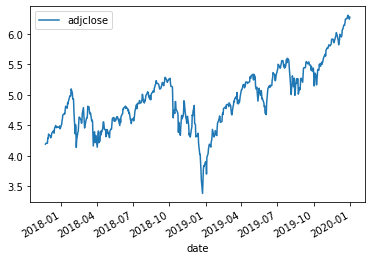

In [25]:
window.test_df.plot();

## Last

In [26]:
score_map = {}
day_slice = slice(-63, -1)

model_name = "last"
model = build_model(model_name, window, epochs=1)

score, scores = evaluate_model(model, window, scaler)
score_map[model_name] = score, scores

Training:   0%|           0/1 ETA: ?s,  ?epochs/s

Epoch 1/1


0/132           ETA: ?s - 

last: [43.488] 1: 25.6, 2: 30.7, 3: 34.8, 4: 38.6, 5: 42.0, 6: 45.1, 7: 48.0, 8: 50.7, 9: 53.3, 10: 55.7


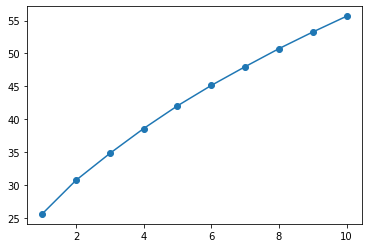

In [27]:
summarize_scores(model_name, score, scores)
plot_scores(model_name, scores)

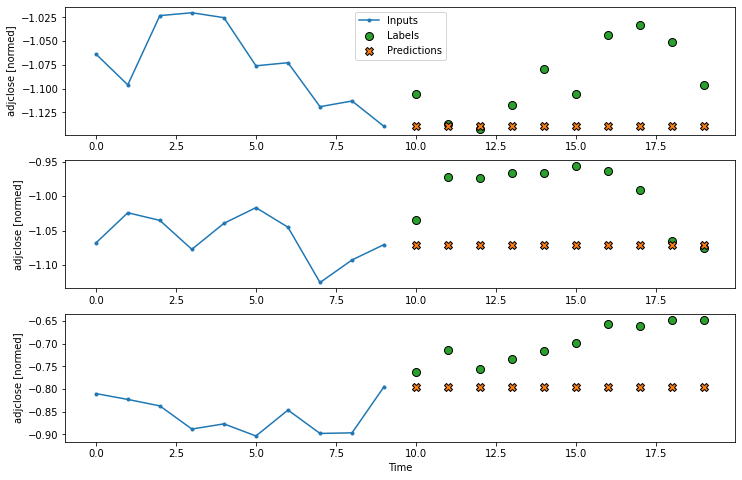

In [28]:
window.plot(plot_col=label_columns[0], model=model, max_subplots=3)

In [29]:
actuals, predictions = generate_actuals_and_predictions(model, window, scaler)

plot_offset_partial = functools.partial(plot_offset, actuals, predictions, window)

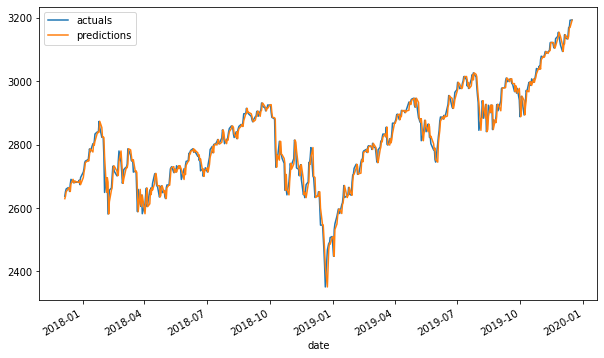

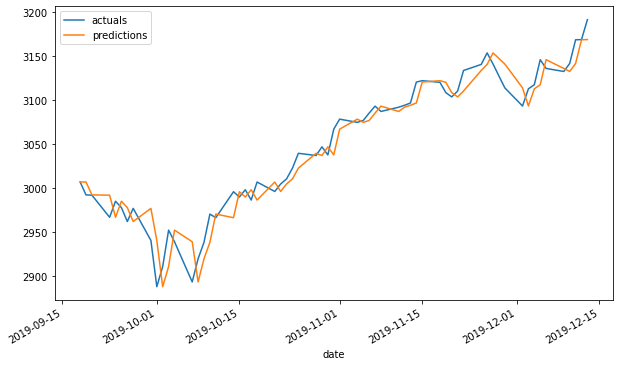

In [30]:
plot_offset_partial()
plot_offset_partial(day_slice=day_slice)

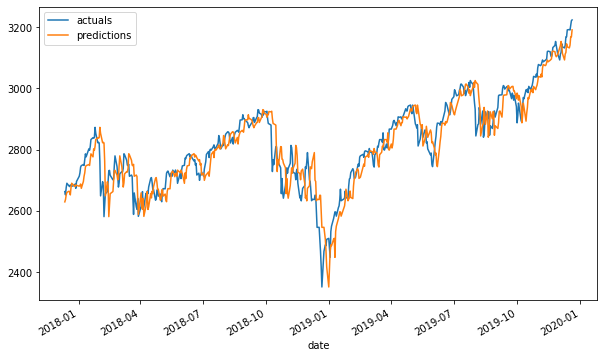

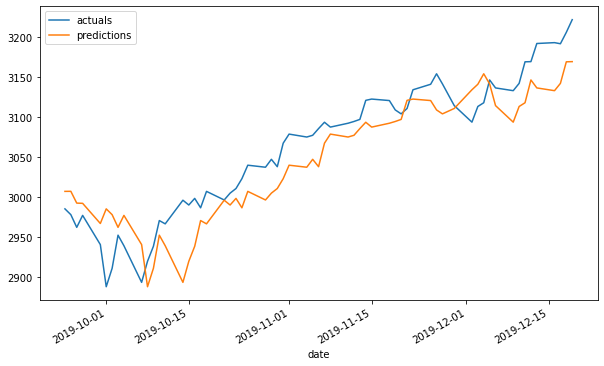

In [31]:
plot_offset_partial(4)
plot_offset_partial(4, day_slice=day_slice)

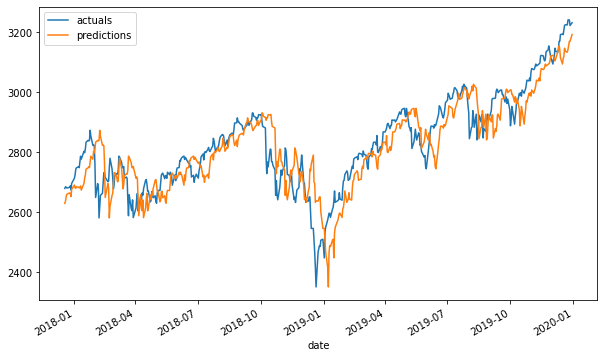

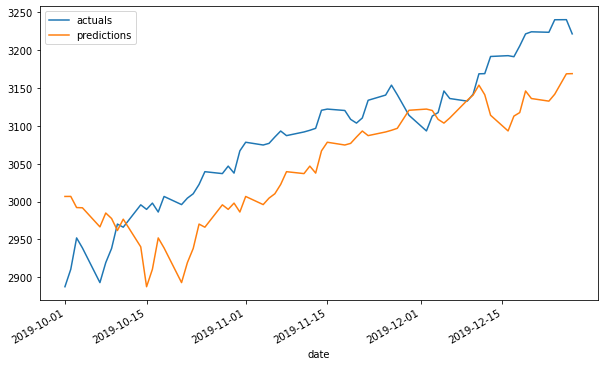

In [32]:
plot_offset_partial(9)
plot_offset_partial(9, day_slice=day_slice)

## Repeat

In [33]:
model_name = "repeat"
model = build_model(model_name, window, epochs=1)

score, scores = evaluate_model(model, window, scaler)
score_map[model_name] = score, scores

Training:   0%|           0/1 ETA: ?s,  ?epochs/s

Epoch 1/1


0/132           ETA: ?s - 

repeat: [76.931] 1: 76.8, 2: 76.8, 3: 76.9, 4: 76.9, 5: 76.9, 6: 76.9, 7: 77.0, 8: 77.0, 9: 77.1, 10: 77.1


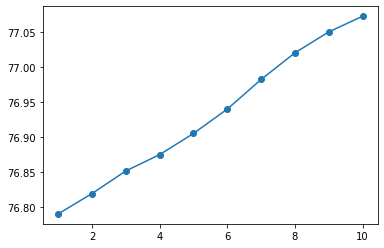

In [34]:
summarize_scores(model_name, score, scores)
plot_scores(model_name, scores)

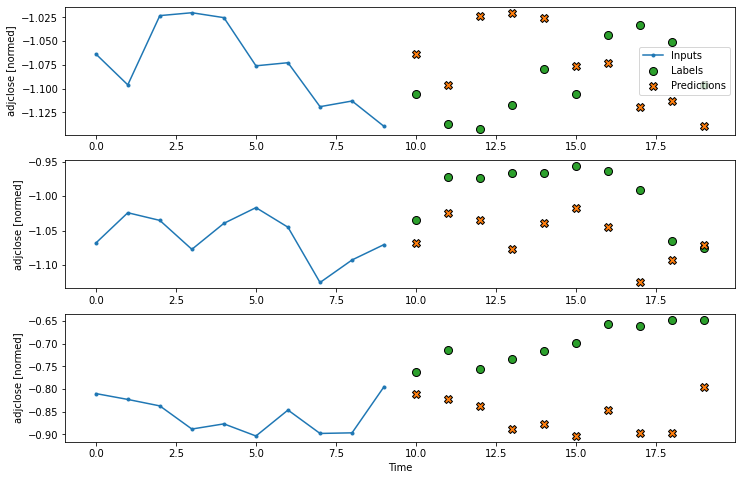

In [35]:
window.plot(plot_col=label_columns[0], model=model, max_subplots=3)

In [36]:
actuals, predictions = generate_actuals_and_predictions(model, window, scaler)

plot_offset_partial = functools.partial(plot_offset, actuals, predictions, window)

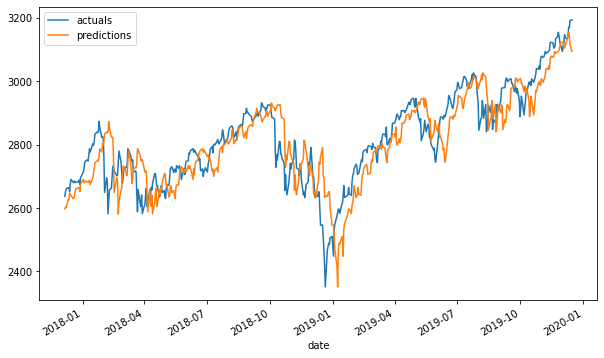

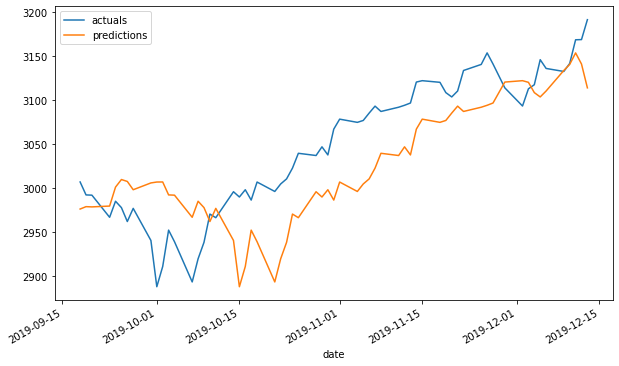

In [37]:
plot_offset_partial()
plot_offset_partial(day_slice=day_slice)

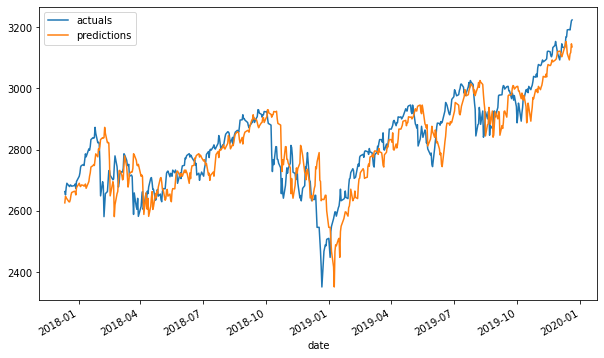

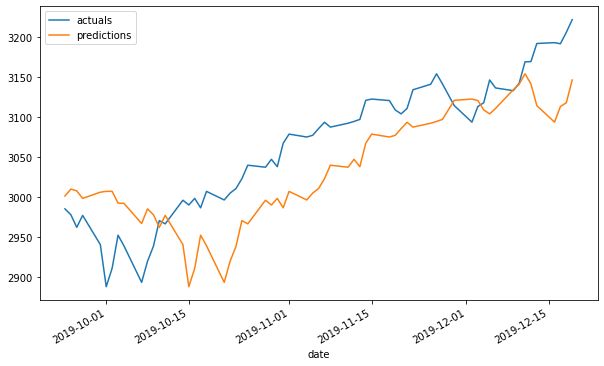

In [38]:
plot_offset_partial(4)
plot_offset_partial(4, day_slice=day_slice)

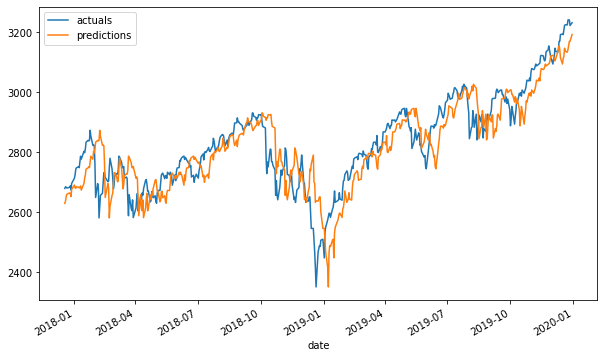

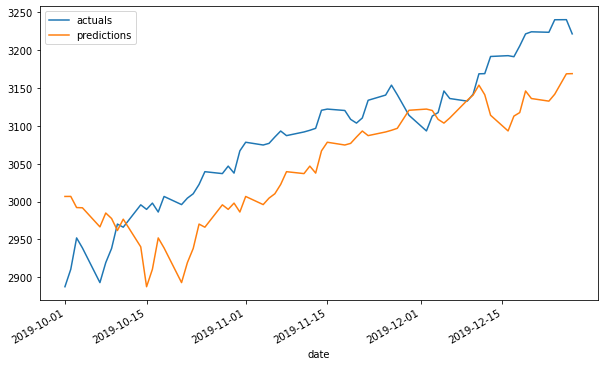

In [39]:
plot_offset_partial(9)
plot_offset_partial(9, day_slice=day_slice)

## LSTM

In [40]:
model_name = "lstm"
model = build_model(model_name, window)

score, scores = evaluate_model(model, window, scaler)
score_map[model_name] = score, scores

Training:   0%|           0/1000 ETA: ?s,  ?epochs/s

Epoch 1/1000


0/132           ETA: ?s - 

Epoch 2/1000


0/132           ETA: ?s - 

Epoch 3/1000


0/132           ETA: ?s - 

Epoch 4/1000


0/132           ETA: ?s - 

Epoch 5/1000


0/132           ETA: ?s - 

Epoch 6/1000


0/132           ETA: ?s - 

Epoch 7/1000


0/132           ETA: ?s - 

Epoch 8/1000


0/132           ETA: ?s - 

Epoch 9/1000


0/132           ETA: ?s - 

Epoch 10/1000


0/132           ETA: ?s - 

Epoch 11/1000


0/132           ETA: ?s - 

Epoch 12/1000


0/132           ETA: ?s - 

Epoch 13/1000


0/132           ETA: ?s - 

Epoch 14/1000


0/132           ETA: ?s - 

Epoch 15/1000


0/132           ETA: ?s - 

Epoch 16/1000


0/132           ETA: ?s - 

Epoch 17/1000


0/132           ETA: ?s - 

Epoch 18/1000


0/132           ETA: ?s - 

Epoch 19/1000


0/132           ETA: ?s - 

Epoch 20/1000


0/132           ETA: ?s - 

Epoch 21/1000


0/132           ETA: ?s - 

Epoch 22/1000


0/132           ETA: ?s - 

Epoch 23/1000


0/132           ETA: ?s - 

Epoch 24/1000


0/132           ETA: ?s - 

Epoch 25/1000


0/132           ETA: ?s - 

Epoch 26/1000


0/132           ETA: ?s - 

Epoch 27/1000


0/132           ETA: ?s - 

Epoch 28/1000


0/132           ETA: ?s - 

Epoch 29/1000


0/132           ETA: ?s - 

Epoch 30/1000


0/132           ETA: ?s - 

Epoch 31/1000


0/132           ETA: ?s - 

Epoch 32/1000


0/132           ETA: ?s - 

Epoch 33/1000


0/132           ETA: ?s - 

Epoch 34/1000


0/132           ETA: ?s - 

Epoch 35/1000


0/132           ETA: ?s - 

Epoch 36/1000


0/132           ETA: ?s - 

Epoch 37/1000


0/132           ETA: ?s - 

Epoch 38/1000


0/132           ETA: ?s - 

Epoch 39/1000


0/132           ETA: ?s - 

Epoch 40/1000


0/132           ETA: ?s - 

Epoch 41/1000


0/132           ETA: ?s - 

Epoch 42/1000


0/132           ETA: ?s - 

Epoch 43/1000


0/132           ETA: ?s - 

Epoch 44/1000


0/132           ETA: ?s - 

Epoch 45/1000


0/132           ETA: ?s - 

Epoch 46/1000


0/132           ETA: ?s - 

Epoch 47/1000


0/132           ETA: ?s - 

Epoch 48/1000


0/132           ETA: ?s - 

Epoch 49/1000


0/132           ETA: ?s - 

Epoch 50/1000


0/132           ETA: ?s - 

Epoch 51/1000


0/132           ETA: ?s - 

Epoch 52/1000


0/132           ETA: ?s - 

Epoch 53/1000


0/132           ETA: ?s - 

Epoch 54/1000


0/132           ETA: ?s - 

Epoch 55/1000


0/132           ETA: ?s - 

Epoch 56/1000


0/132           ETA: ?s - 

Epoch 57/1000


0/132           ETA: ?s - 

Epoch 58/1000


0/132           ETA: ?s - 

Epoch 59/1000


0/132           ETA: ?s - 

Epoch 60/1000


0/132           ETA: ?s - 

Epoch 61/1000


0/132           ETA: ?s - 

Epoch 62/1000


0/132           ETA: ?s - 

Epoch 63/1000


0/132           ETA: ?s - 

Epoch 64/1000


0/132           ETA: ?s - 

Epoch 65/1000


0/132           ETA: ?s - 

Epoch 66/1000


0/132           ETA: ?s - 

Epoch 67/1000


0/132           ETA: ?s - 

Epoch 68/1000


0/132           ETA: ?s - 

Epoch 69/1000


0/132           ETA: ?s - 

Epoch 70/1000


0/132           ETA: ?s - 

Epoch 71/1000


0/132           ETA: ?s - 

Epoch 72/1000


0/132           ETA: ?s - 

Epoch 73/1000


0/132           ETA: ?s - 

Epoch 74/1000


0/132           ETA: ?s - 

Epoch 75/1000


0/132           ETA: ?s - 

Epoch 76/1000


0/132           ETA: ?s - 

Epoch 77/1000


0/132           ETA: ?s - 

Epoch 78/1000


0/132           ETA: ?s - 

Epoch 79/1000


0/132           ETA: ?s - 

Epoch 80/1000


0/132           ETA: ?s - 

Epoch 81/1000


0/132           ETA: ?s - 

Epoch 82/1000


0/132           ETA: ?s - 

Epoch 83/1000


0/132           ETA: ?s - 

Epoch 84/1000


0/132           ETA: ?s - 

Epoch 85/1000


0/132           ETA: ?s - 

Epoch 86/1000


0/132           ETA: ?s - 

Epoch 87/1000


0/132           ETA: ?s - 

Epoch 88/1000


0/132           ETA: ?s - 

Epoch 89/1000


0/132           ETA: ?s - 

Epoch 90/1000


0/132           ETA: ?s - 

Epoch 91/1000


0/132           ETA: ?s - 

Epoch 92/1000


0/132           ETA: ?s - 

Epoch 93/1000


0/132           ETA: ?s - 

Epoch 94/1000


0/132           ETA: ?s - 

Epoch 95/1000


0/132           ETA: ?s - 

Epoch 96/1000


0/132           ETA: ?s - 

Epoch 97/1000


0/132           ETA: ?s - 

Epoch 98/1000


0/132           ETA: ?s - 

Epoch 99/1000


0/132           ETA: ?s - 

Epoch 100/1000


0/132           ETA: ?s - 

Epoch 101/1000


0/132           ETA: ?s - 

Epoch 102/1000


0/132           ETA: ?s - 

Epoch 103/1000


0/132           ETA: ?s - 

Epoch 104/1000


0/132           ETA: ?s - 

Epoch 105/1000


0/132           ETA: ?s - 

Epoch 106/1000


0/132           ETA: ?s - 

Epoch 107/1000


0/132           ETA: ?s - 

Epoch 108/1000


0/132           ETA: ?s - 

Epoch 109/1000


0/132           ETA: ?s - 

Epoch 110/1000


0/132           ETA: ?s - 

Epoch 111/1000


0/132           ETA: ?s - 

Epoch 112/1000


0/132           ETA: ?s - 

Epoch 113/1000


0/132           ETA: ?s - 

Epoch 114/1000


0/132           ETA: ?s - 

Epoch 115/1000


0/132           ETA: ?s - 

Epoch 116/1000


0/132           ETA: ?s - 

Epoch 117/1000


0/132           ETA: ?s - 

Epoch 118/1000


0/132           ETA: ?s - 

Epoch 119/1000


0/132           ETA: ?s - 

Epoch 120/1000


0/132           ETA: ?s - 

Epoch 121/1000


0/132           ETA: ?s - 

Epoch 122/1000


0/132           ETA: ?s - 

Epoch 123/1000


0/132           ETA: ?s - 

Epoch 124/1000


0/132           ETA: ?s - 

Epoch 125/1000


0/132           ETA: ?s - 

Epoch 126/1000


0/132           ETA: ?s - 

Epoch 127/1000


0/132           ETA: ?s - 

Epoch 128/1000


0/132           ETA: ?s - 

Epoch 129/1000


0/132           ETA: ?s - 

Epoch 130/1000


0/132           ETA: ?s - 

Epoch 131/1000


0/132           ETA: ?s - 

Epoch 132/1000


0/132           ETA: ?s - 

Epoch 133/1000


0/132           ETA: ?s - 

Epoch 134/1000


0/132           ETA: ?s - 

Epoch 135/1000


0/132           ETA: ?s - 

Epoch 136/1000


0/132           ETA: ?s - 

Epoch 137/1000


0/132           ETA: ?s - 

Epoch 138/1000


0/132           ETA: ?s - 

Epoch 139/1000


0/132           ETA: ?s - 

Epoch 140/1000


0/132           ETA: ?s - 

Epoch 141/1000


0/132           ETA: ?s - 

Epoch 142/1000


0/132           ETA: ?s - 

Restoring model weights from the end of the best epoch: 42.
Epoch 00142: early stopping


lstm: [227.080] 1: 156.0, 2: 180.2, 3: 196.7, 4: 215.4, 5: 225.7, 6: 236.6, 7: 243.9, 8: 255.1, 9: 262.2, 10: 271.2


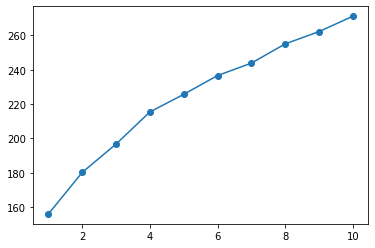

In [41]:
summarize_scores(model_name, score, scores)
plot_scores(model_name, scores)

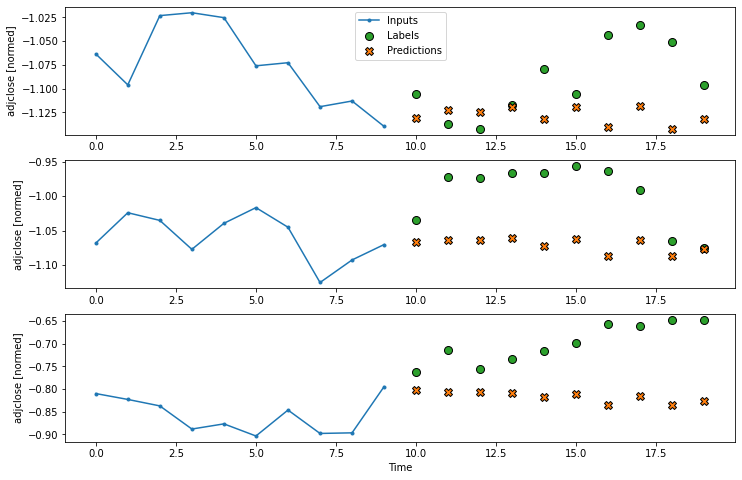

In [42]:
window.plot(plot_col=label_columns[0], model=model, max_subplots=3)

In [43]:
actuals, predictions = generate_actuals_and_predictions(model, window, scaler)

plot_offset_partial = functools.partial(plot_offset, actuals, predictions, window)

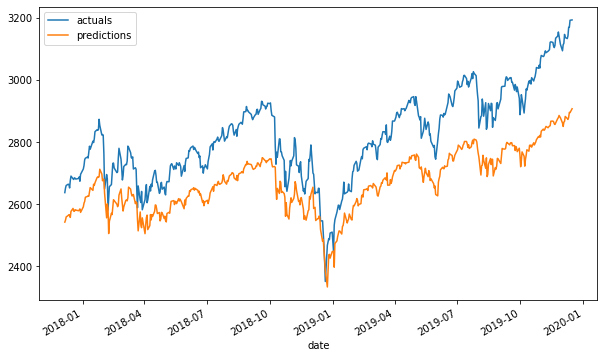

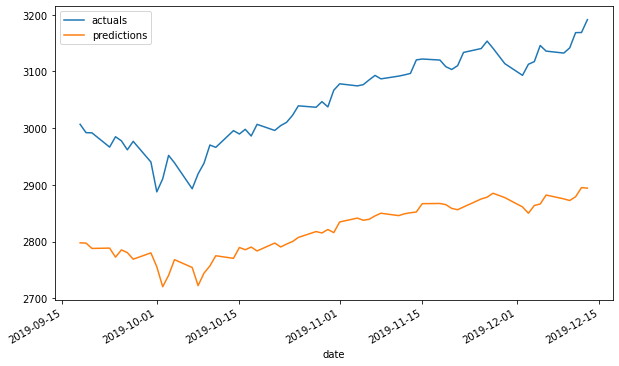

In [44]:
plot_offset_partial()
plot_offset_partial(day_slice=day_slice)

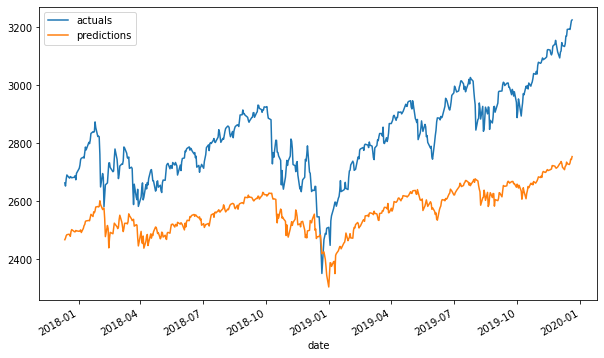

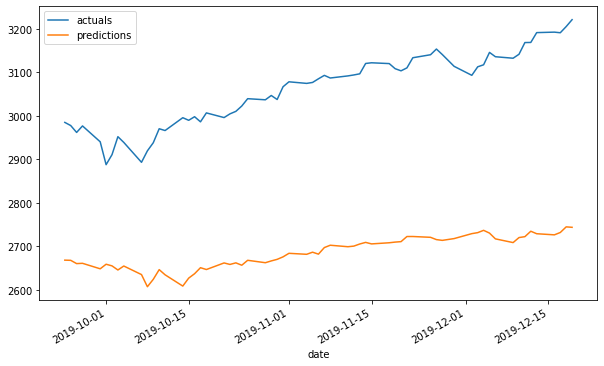

In [45]:
plot_offset_partial(4)
plot_offset_partial(4, day_slice=day_slice)

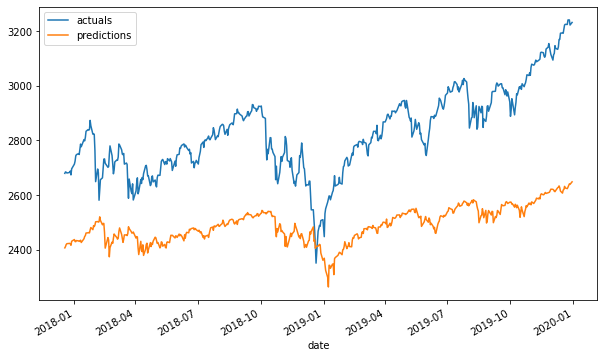

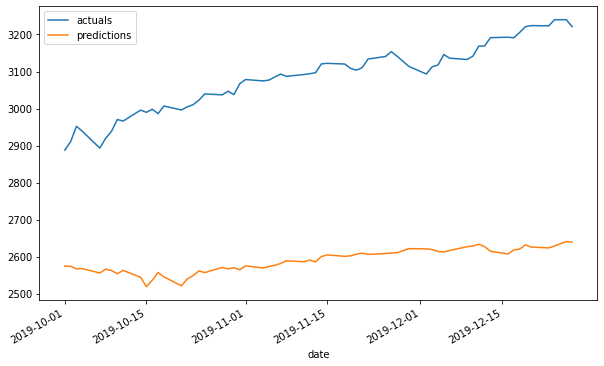

In [46]:
plot_offset_partial(9)
plot_offset_partial(9, day_slice=day_slice)

## TCN

In [47]:
model_name = "tcn"
model = build_model(model_name, window)

score, scores = evaluate_model(model, window, scaler)
score_map[model_name] = score, scores

Training:   0%|           0/1000 ETA: ?s,  ?epochs/s

Epoch 1/1000


0/132           ETA: ?s - 

Epoch 2/1000


0/132           ETA: ?s - 

Epoch 3/1000


0/132           ETA: ?s - 

Epoch 4/1000


0/132           ETA: ?s - 

Epoch 5/1000


0/132           ETA: ?s - 

Epoch 6/1000


0/132           ETA: ?s - 

Epoch 7/1000


0/132           ETA: ?s - 

Epoch 8/1000


0/132           ETA: ?s - 

Epoch 9/1000


0/132           ETA: ?s - 

Epoch 10/1000


0/132           ETA: ?s - 

Epoch 11/1000


0/132           ETA: ?s - 

Epoch 12/1000


0/132           ETA: ?s - 

Epoch 13/1000


0/132           ETA: ?s - 

Epoch 14/1000


0/132           ETA: ?s - 

Epoch 15/1000


0/132           ETA: ?s - 

Epoch 16/1000


0/132           ETA: ?s - 

Epoch 17/1000


0/132           ETA: ?s - 

Epoch 18/1000


0/132           ETA: ?s - 

Epoch 19/1000


0/132           ETA: ?s - 

Epoch 20/1000


0/132           ETA: ?s - 

Epoch 21/1000


0/132           ETA: ?s - 

Epoch 22/1000


0/132           ETA: ?s - 

Epoch 23/1000


0/132           ETA: ?s - 

Epoch 24/1000


0/132           ETA: ?s - 

Epoch 25/1000


0/132           ETA: ?s - 

Epoch 26/1000


0/132           ETA: ?s - 

Epoch 27/1000


0/132           ETA: ?s - 

Epoch 28/1000


0/132           ETA: ?s - 

Epoch 29/1000


0/132           ETA: ?s - 

Epoch 30/1000


0/132           ETA: ?s - 

Epoch 31/1000


0/132           ETA: ?s - 

Epoch 32/1000


0/132           ETA: ?s - 

Epoch 33/1000


0/132           ETA: ?s - 

Epoch 34/1000


0/132           ETA: ?s - 

Epoch 35/1000


0/132           ETA: ?s - 

Epoch 36/1000


0/132           ETA: ?s - 

Epoch 37/1000


0/132           ETA: ?s - 

Epoch 38/1000


0/132           ETA: ?s - 

Epoch 39/1000


0/132           ETA: ?s - 

Epoch 40/1000


0/132           ETA: ?s - 

Epoch 41/1000


0/132           ETA: ?s - 

Epoch 42/1000


0/132           ETA: ?s - 

Epoch 43/1000


0/132           ETA: ?s - 

Epoch 44/1000


0/132           ETA: ?s - 

Epoch 45/1000


0/132           ETA: ?s - 

Epoch 46/1000


0/132           ETA: ?s - 

Epoch 47/1000


0/132           ETA: ?s - 

Epoch 48/1000


0/132           ETA: ?s - 

Epoch 49/1000


0/132           ETA: ?s - 

Epoch 50/1000


0/132           ETA: ?s - 

Epoch 51/1000


0/132           ETA: ?s - 

Epoch 52/1000


0/132           ETA: ?s - 

Epoch 53/1000


0/132           ETA: ?s - 

Epoch 54/1000


0/132           ETA: ?s - 

Epoch 55/1000


0/132           ETA: ?s - 

Epoch 56/1000


0/132           ETA: ?s - 

Epoch 57/1000


0/132           ETA: ?s - 

Epoch 58/1000


0/132           ETA: ?s - 

Epoch 59/1000


0/132           ETA: ?s - 

Epoch 60/1000


0/132           ETA: ?s - 

Epoch 61/1000


0/132           ETA: ?s - 

Epoch 62/1000


0/132           ETA: ?s - 

Epoch 63/1000


0/132           ETA: ?s - 

Epoch 64/1000


0/132           ETA: ?s - 

Epoch 65/1000


0/132           ETA: ?s - 

Epoch 66/1000


0/132           ETA: ?s - 

Epoch 67/1000


0/132           ETA: ?s - 

Epoch 68/1000


0/132           ETA: ?s - 

Epoch 69/1000


0/132           ETA: ?s - 

Epoch 70/1000


0/132           ETA: ?s - 

Epoch 71/1000


0/132           ETA: ?s - 

Epoch 72/1000


0/132           ETA: ?s - 

Epoch 73/1000


0/132           ETA: ?s - 

Epoch 74/1000


0/132           ETA: ?s - 

Epoch 75/1000


0/132           ETA: ?s - 

Epoch 76/1000


0/132           ETA: ?s - 

Epoch 77/1000


0/132           ETA: ?s - 

Epoch 78/1000


0/132           ETA: ?s - 

Epoch 79/1000


0/132           ETA: ?s - 

Epoch 80/1000


0/132           ETA: ?s - 

Epoch 81/1000


0/132           ETA: ?s - 

Epoch 82/1000


0/132           ETA: ?s - 

Epoch 83/1000


0/132           ETA: ?s - 

Epoch 84/1000


0/132           ETA: ?s - 

Epoch 85/1000


0/132           ETA: ?s - 

Epoch 86/1000


0/132           ETA: ?s - 

Epoch 87/1000


0/132           ETA: ?s - 

Epoch 88/1000


0/132           ETA: ?s - 

Epoch 89/1000


0/132           ETA: ?s - 

Epoch 90/1000


0/132           ETA: ?s - 

Epoch 91/1000


0/132           ETA: ?s - 

Epoch 92/1000


0/132           ETA: ?s - 

Epoch 93/1000


0/132           ETA: ?s - 

Epoch 94/1000


0/132           ETA: ?s - 

Epoch 95/1000


0/132           ETA: ?s - 

Epoch 96/1000


0/132           ETA: ?s - 

Epoch 97/1000


0/132           ETA: ?s - 

Epoch 98/1000


0/132           ETA: ?s - 

Epoch 99/1000


0/132           ETA: ?s - 

Epoch 100/1000


0/132           ETA: ?s - 

Epoch 101/1000


0/132           ETA: ?s - 

Epoch 102/1000


0/132           ETA: ?s - 

Epoch 103/1000


0/132           ETA: ?s - 

Epoch 104/1000


0/132           ETA: ?s - 

Epoch 105/1000


0/132           ETA: ?s - 

Epoch 106/1000


0/132           ETA: ?s - 

Epoch 107/1000


0/132           ETA: ?s - 

Epoch 108/1000


0/132           ETA: ?s - 

Epoch 109/1000


0/132           ETA: ?s - 

Epoch 110/1000


0/132           ETA: ?s - 

Epoch 111/1000


0/132           ETA: ?s - 

Epoch 112/1000


0/132           ETA: ?s - 

Epoch 113/1000


0/132           ETA: ?s - 

Epoch 114/1000


0/132           ETA: ?s - 

Epoch 115/1000


0/132           ETA: ?s - 

Epoch 116/1000


0/132           ETA: ?s - 

Epoch 117/1000


0/132           ETA: ?s - 

Epoch 118/1000


0/132           ETA: ?s - 

Epoch 119/1000


0/132           ETA: ?s - 

Epoch 120/1000


0/132           ETA: ?s - 

Epoch 121/1000


0/132           ETA: ?s - 

Epoch 122/1000


0/132           ETA: ?s - 

Epoch 123/1000


0/132           ETA: ?s - 

Epoch 124/1000


0/132           ETA: ?s - 

Epoch 125/1000


0/132           ETA: ?s - 

Epoch 126/1000


0/132           ETA: ?s - 

Epoch 127/1000


0/132           ETA: ?s - 

Epoch 128/1000


0/132           ETA: ?s - 

Epoch 129/1000


0/132           ETA: ?s - 

Epoch 130/1000


0/132           ETA: ?s - 

Epoch 131/1000


0/132           ETA: ?s - 

Epoch 132/1000


0/132           ETA: ?s - 

Epoch 133/1000


0/132           ETA: ?s - 

Epoch 134/1000


0/132           ETA: ?s - 

Epoch 135/1000


0/132           ETA: ?s - 

Epoch 136/1000


0/132           ETA: ?s - 

Epoch 137/1000


0/132           ETA: ?s - 

Epoch 138/1000


0/132           ETA: ?s - 

Epoch 139/1000


0/132           ETA: ?s - 

Epoch 140/1000


0/132           ETA: ?s - 

Epoch 141/1000


0/132           ETA: ?s - 

Epoch 142/1000


0/132           ETA: ?s - 

Epoch 143/1000


0/132           ETA: ?s - 

Epoch 144/1000


0/132           ETA: ?s - 

Epoch 145/1000


0/132           ETA: ?s - 

Epoch 146/1000


0/132           ETA: ?s - 

Epoch 147/1000


0/132           ETA: ?s - 

Restoring model weights from the end of the best epoch: 47.
Epoch 00147: early stopping


tcn: [44.186] 1: 26.4, 2: 32.1, 3: 35.8, 4: 39.5, 5: 43.0, 6: 46.0, 7: 48.6, 8: 51.2, 9: 53.7, 10: 56.0


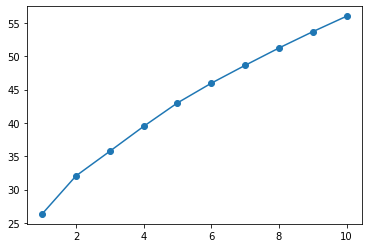

In [48]:
summarize_scores(model_name, score, scores)
plot_scores(model_name, scores)

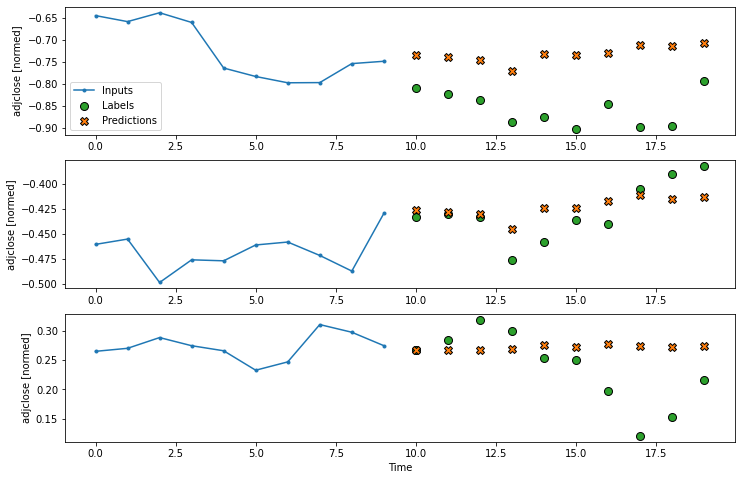

In [49]:
window._example = None
window.plot(plot_col=label_columns[0], model=model, max_subplots=3)

In [50]:
actuals, predictions = generate_actuals_and_predictions(model, window, scaler)

plot_offset_partial = functools.partial(plot_offset, actuals, predictions, window)

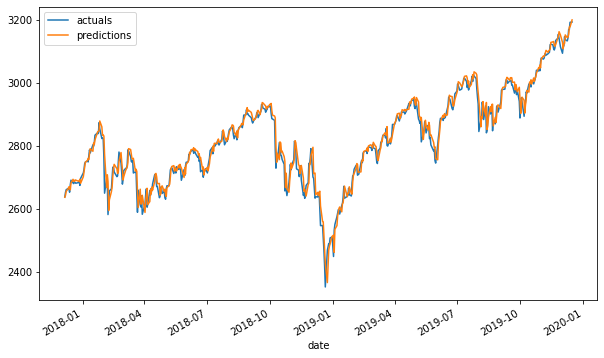

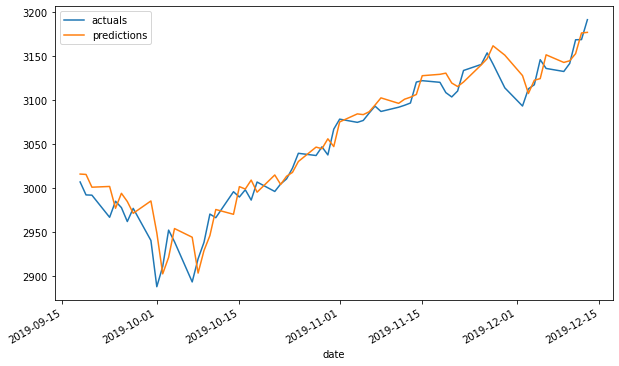

In [51]:
plot_offset_partial()
plot_offset_partial(day_slice=day_slice)

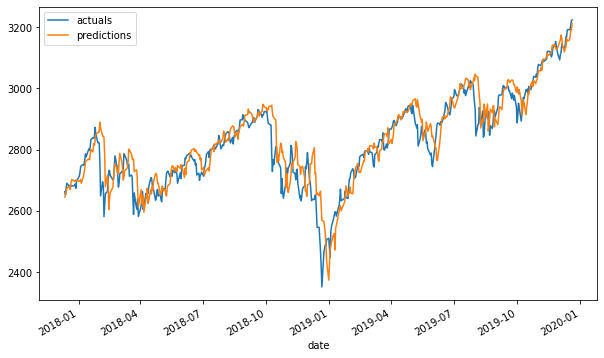

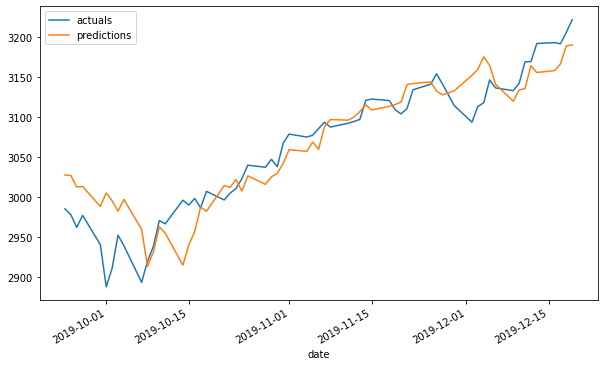

In [52]:
plot_offset_partial(4)
plot_offset_partial(4, day_slice=day_slice)

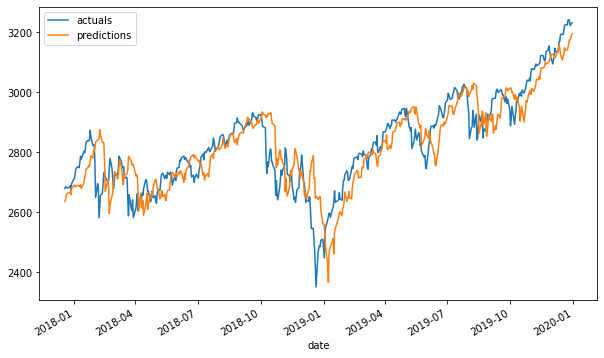

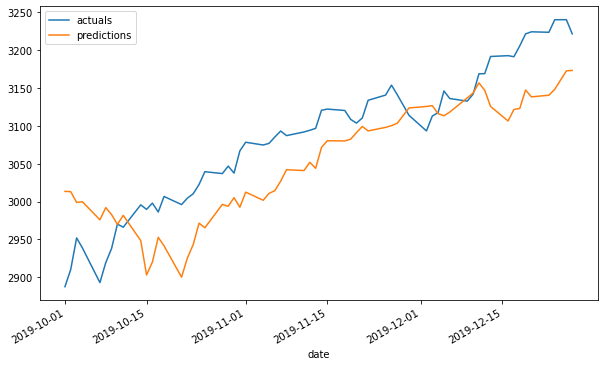

In [53]:
plot_offset_partial(9)
plot_offset_partial(9, day_slice=day_slice)

## N-Beats

In [54]:
model_name = "nbeats"
model = build_model(model_name, window)

score, scores = evaluate_model(model, window, scaler)
score_map[model_name] = score, scores

Training:   0%|           0/1000 ETA: ?s,  ?epochs/s

Epoch 1/1000


0/132           ETA: ?s - 

Epoch 2/1000


0/132           ETA: ?s - 

Epoch 3/1000


0/132           ETA: ?s - 

Epoch 4/1000


0/132           ETA: ?s - 

Epoch 5/1000


0/132           ETA: ?s - 

Epoch 6/1000


0/132           ETA: ?s - 

Epoch 7/1000


0/132           ETA: ?s - 

Epoch 8/1000


0/132           ETA: ?s - 

Epoch 9/1000


0/132           ETA: ?s - 

Epoch 10/1000


0/132           ETA: ?s - 

Epoch 11/1000


0/132           ETA: ?s - 

Epoch 12/1000


0/132           ETA: ?s - 

Epoch 13/1000


0/132           ETA: ?s - 

Epoch 14/1000


0/132           ETA: ?s - 

Epoch 15/1000


0/132           ETA: ?s - 

Epoch 16/1000


0/132           ETA: ?s - 

Epoch 17/1000


0/132           ETA: ?s - 

Epoch 18/1000


0/132           ETA: ?s - 

Epoch 19/1000


0/132           ETA: ?s - 

Epoch 20/1000


0/132           ETA: ?s - 

Epoch 21/1000


0/132           ETA: ?s - 

Epoch 22/1000


0/132           ETA: ?s - 

Epoch 23/1000


0/132           ETA: ?s - 

Epoch 24/1000


0/132           ETA: ?s - 

Epoch 25/1000


0/132           ETA: ?s - 

Epoch 26/1000


0/132           ETA: ?s - 

Epoch 27/1000


0/132           ETA: ?s - 

Epoch 28/1000


0/132           ETA: ?s - 

Epoch 29/1000


0/132           ETA: ?s - 

Epoch 30/1000


0/132           ETA: ?s - 

Epoch 31/1000


0/132           ETA: ?s - 

Epoch 32/1000


0/132           ETA: ?s - 

Epoch 33/1000


0/132           ETA: ?s - 

Epoch 34/1000


0/132           ETA: ?s - 

Epoch 35/1000


0/132           ETA: ?s - 

Epoch 36/1000


0/132           ETA: ?s - 

Epoch 37/1000


0/132           ETA: ?s - 

Epoch 38/1000


0/132           ETA: ?s - 

Epoch 39/1000


0/132           ETA: ?s - 

Epoch 40/1000


0/132           ETA: ?s - 

Epoch 41/1000


0/132           ETA: ?s - 

Epoch 42/1000


0/132           ETA: ?s - 

Epoch 43/1000


0/132           ETA: ?s - 

Epoch 44/1000


0/132           ETA: ?s - 

Epoch 45/1000


0/132           ETA: ?s - 

Epoch 46/1000


0/132           ETA: ?s - 

Epoch 47/1000


0/132           ETA: ?s - 

Epoch 48/1000


0/132           ETA: ?s - 

Epoch 49/1000


0/132           ETA: ?s - 

Epoch 50/1000


0/132           ETA: ?s - 

Epoch 51/1000


0/132           ETA: ?s - 

Epoch 52/1000


0/132           ETA: ?s - 

Epoch 53/1000


0/132           ETA: ?s - 

Epoch 54/1000


0/132           ETA: ?s - 

Epoch 55/1000


0/132           ETA: ?s - 

Epoch 56/1000


0/132           ETA: ?s - 

Epoch 57/1000


0/132           ETA: ?s - 

Epoch 58/1000


0/132           ETA: ?s - 

Epoch 59/1000


0/132           ETA: ?s - 

Epoch 60/1000


0/132           ETA: ?s - 

Epoch 61/1000


0/132           ETA: ?s - 

Epoch 62/1000


0/132           ETA: ?s - 

Epoch 63/1000


0/132           ETA: ?s - 

Epoch 64/1000


0/132           ETA: ?s - 

Epoch 65/1000


0/132           ETA: ?s - 

Epoch 66/1000


0/132           ETA: ?s - 

Epoch 67/1000


0/132           ETA: ?s - 

Epoch 68/1000


0/132           ETA: ?s - 

Epoch 69/1000


0/132           ETA: ?s - 

Epoch 70/1000


0/132           ETA: ?s - 

Epoch 71/1000


0/132           ETA: ?s - 

Epoch 72/1000


0/132           ETA: ?s - 

Epoch 73/1000


0/132           ETA: ?s - 

Epoch 74/1000


0/132           ETA: ?s - 

Epoch 75/1000


0/132           ETA: ?s - 

Epoch 76/1000


0/132           ETA: ?s - 

Epoch 77/1000


0/132           ETA: ?s - 

Epoch 78/1000


0/132           ETA: ?s - 

Epoch 79/1000


0/132           ETA: ?s - 

Epoch 80/1000


0/132           ETA: ?s - 

Epoch 81/1000


0/132           ETA: ?s - 

Epoch 82/1000


0/132           ETA: ?s - 

Epoch 83/1000


0/132           ETA: ?s - 

Epoch 84/1000


0/132           ETA: ?s - 

Epoch 85/1000


0/132           ETA: ?s - 

Epoch 86/1000


0/132           ETA: ?s - 

Epoch 87/1000


0/132           ETA: ?s - 

Epoch 88/1000


0/132           ETA: ?s - 

Epoch 89/1000


0/132           ETA: ?s - 

Epoch 90/1000


0/132           ETA: ?s - 

Epoch 91/1000


0/132           ETA: ?s - 

Epoch 92/1000


0/132           ETA: ?s - 

Epoch 93/1000


0/132           ETA: ?s - 

Epoch 94/1000


0/132           ETA: ?s - 

Epoch 95/1000


0/132           ETA: ?s - 

Epoch 96/1000


0/132           ETA: ?s - 

Epoch 97/1000


0/132           ETA: ?s - 

Epoch 98/1000


0/132           ETA: ?s - 

Epoch 99/1000


0/132           ETA: ?s - 

Epoch 100/1000


0/132           ETA: ?s - 

Epoch 101/1000


0/132           ETA: ?s - 

Epoch 102/1000


0/132           ETA: ?s - 

Epoch 103/1000


0/132           ETA: ?s - 

Epoch 104/1000


0/132           ETA: ?s - 

Epoch 105/1000


0/132           ETA: ?s - 

Epoch 106/1000


0/132           ETA: ?s - 

Epoch 107/1000


0/132           ETA: ?s - 

Epoch 108/1000


0/132           ETA: ?s - 

Epoch 109/1000


0/132           ETA: ?s - 

Epoch 110/1000


0/132           ETA: ?s - 

Epoch 111/1000


0/132           ETA: ?s - 

Epoch 112/1000


0/132           ETA: ?s - 

Epoch 113/1000


0/132           ETA: ?s - 

Epoch 114/1000


0/132           ETA: ?s - 

Epoch 115/1000


0/132           ETA: ?s - 

Restoring model weights from the end of the best epoch: 15.
Epoch 00115: early stopping


nbeats: [48.059] 1: 28.4, 2: 33.7, 3: 39.5, 4: 43.1, 5: 47.1, 6: 50.3, 7: 53.7, 8: 55.8, 9: 57.9, 10: 60.2


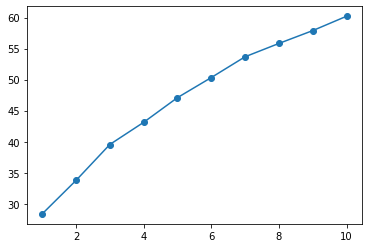

In [55]:
summarize_scores(model_name, score, scores)
plot_scores(model_name, scores)

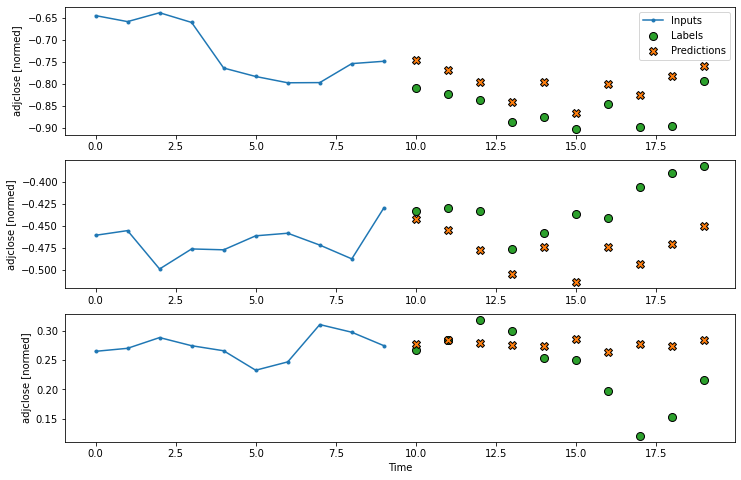

In [56]:
window.plot(plot_col=label_columns[0], model=model, max_subplots=3)

In [57]:
actuals, predictions = generate_actuals_and_predictions(model, window, scaler)

plot_offset_partial = functools.partial(plot_offset, actuals, predictions, window)

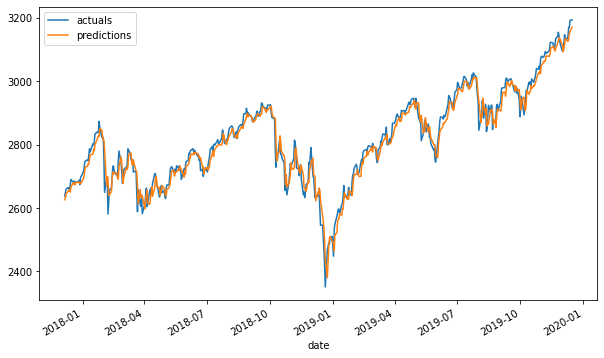

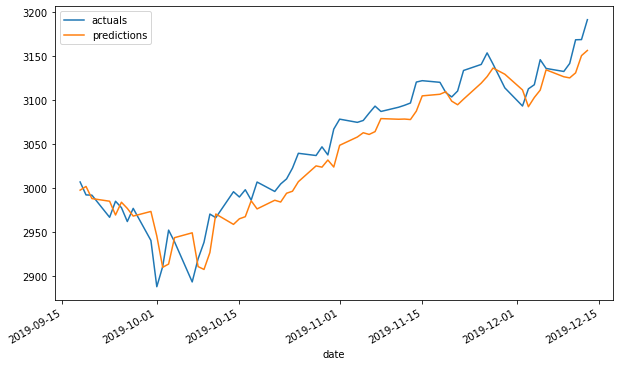

In [58]:
plot_offset_partial()
plot_offset_partial(day_slice=day_slice)

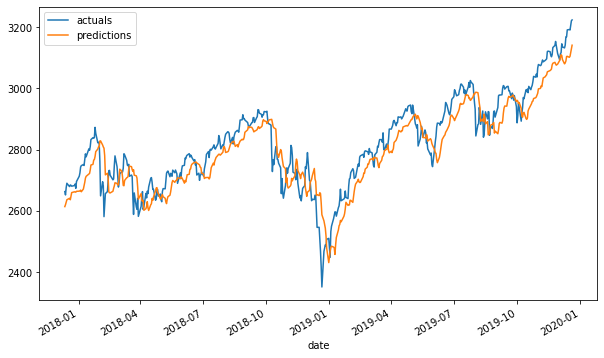

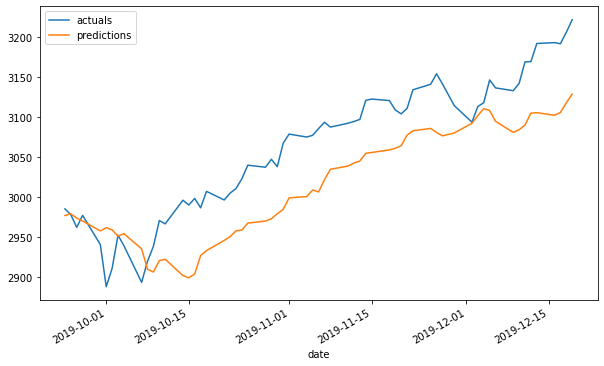

In [59]:
plot_offset_partial(4)
plot_offset_partial(4, day_slice=day_slice)

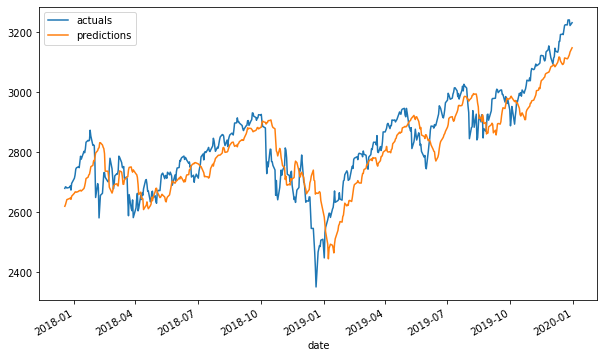

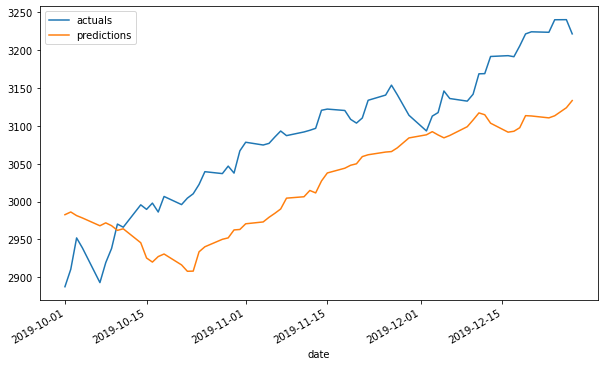

In [60]:
plot_offset_partial(9)
plot_offset_partial(9, day_slice=day_slice)

## Summary of Results

In [61]:
model_summaries = {}

for model_name in score_map.keys():
    score, scores = score_map[model_name]

    model_summary = {"rmse_overall": score}
    for i, s in enumerate(scores):
        model_summary[f"rmse t+{i + 1}"] = s

    model_summaries[model_name] = model_summary

pd.DataFrame.from_dict(model_summaries, orient="index").sort_values("rmse_overall")

,rmse_overall,rmse t+1,rmse t+2,rmse t+3,rmse t+4,rmse t+5,rmse t+6,rmse t+7,rmse t+8,rmse t+9,rmse t+10
lstm,227.079671,155.973770,180.164139,196.703308,215.397675,225.678619,236.631699,243.863800,255.071365,262.238403,271.203156
repeat,76.930929,76.790443,76.819527,76.851837,76.875137,76.905357,76.940147,76.982483,77.020546,77.050407,77.072838
nbeats,48.058608,28.356550,33.749962,39.544807,43.117889,47.096802,50.334431,53.686348,55.833324,57.903008,60.217884
tcn,44.186017,26.362452,32.060085,35.752018,39.482037,42.999401,45.950241,48.627785,51.223789,53.670994,55.988289
last,43.488252,25.597105,30.712809,34.793476,38.579540,42.036518,45.137436,47.984009,50.727859,53.258839,55.660431


## Tune model

In [62]:
max_trials = 32

tuner = kt.RandomSearch(
    build_model_for_tuning,
    objective=kt.Objective("val_loss", direction="min"),
    max_trials=max_trials,
    overwrite=True,
    project_name="s+p-500-forecasting"
)

tuner.search(window.train(), validation_data=window.val())

Trial 32 Complete [00h 00m 12s]
val_loss: 0.060814253985881805

Best val_loss So Far: 0.026050115004181862
Total elapsed time: 00h 39m 41s
INFO:tensorflow:Oracle triggered exit


In [63]:
best_model = tuner.get_best_models()[0]
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 tcn (TCN)                   (None, 192)               2436864   
                                                                 
 dense (Dense)               (None, 10)                1930      
                                                                 
Total params: 2,438,794
Trainable params: 2,438,794
Non-trainable params: 0
_________________________________________________________________


In [64]:
tuner.results_summary()

Results summary
Results in ./s+p-500-forecasting
Showing 10 best trials
Objective(name='val_loss', direction='min')
Trial summary
Hyperparameters:
nb_filters: 192
kernel_size: 6
dropout_rate: 0.0
Score: 0.026050115004181862
Trial summary
Hyperparameters:
nb_filters: 160
kernel_size: 7
dropout_rate: 0.05
Score: 0.029618555679917336
Trial summary
Hyperparameters:
nb_filters: 224
kernel_size: 7
dropout_rate: 0.1
Score: 0.03001008741557598
Trial summary
Hyperparameters:
nb_filters: 256
kernel_size: 5
dropout_rate: 0.1
Score: 0.030671514570713043
Trial summary
Hyperparameters:
nb_filters: 192
kernel_size: 7
dropout_rate: 0.1
Score: 0.03390871733427048
Trial summary
Hyperparameters:
nb_filters: 96
kernel_size: 5
dropout_rate: 0.0
Score: 0.04417258873581886
Trial summary
Hyperparameters:
nb_filters: 96
kernel_size: 4
dropout_rate: 0.0
Score: 0.04637153074145317
Trial summary
Hyperparameters:
nb_filters: 160
kernel_size: 8
dropout_rate: 0.1
Score: 0.05635778605937958
Trial summary
Hyperparamet

## Evaluate tuned model

In [69]:
model_name = "tuned_tcn"
#model = build_model(model_name, window, patience=50)
model = load_saved_model(model_name)

score, scores = evaluate_model(model, window, scaler)
score_map[model_name] = score, scores

summarize_scores(model_name, score, scores)
plot_scores(model_name, scores)

window._example = None
window.plot(plot_col=label_columns[0], model=model, max_subplots=3)

actuals, predictions = generate_actuals_and_predictions(model, window, scaler)

plot_offset_partial = functools.partial(plot_offset, actuals, predictions, window)

plot_offset_partial()
plot_offset_partial(day_slice=day_slice)

plot_offset_partial(4)
plot_offset_partial(4, day_slice=day_slice)

plot_offset_partial(9)
plot_offset_partial(9, day_slice=day_slice)

ValueError: Unknown layer: TCN. Please ensure this object is passed to the `custom_objects` argument. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_object for details.